## Importing the dependencies

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## Data collection and Preprocessing

In [55]:
#Loading the data
mail_data=pd.read_csv("mail_data.csv")

In [56]:
print(mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [57]:
print(mail_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [58]:
mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [59]:
#checking whether there are any null values
mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [60]:
#printing head
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
mail_data.shape

(5572, 2)

In [62]:
#label spam-1 and ham-0
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mail_data['Category']=le.fit_transform(mail_data['Category'])

In [63]:
mail_data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
#Seperating the texts and label

x=mail_data['Message']
y=mail_data['Category']

In [65]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [66]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int32


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 600x600 with 0 Axes>

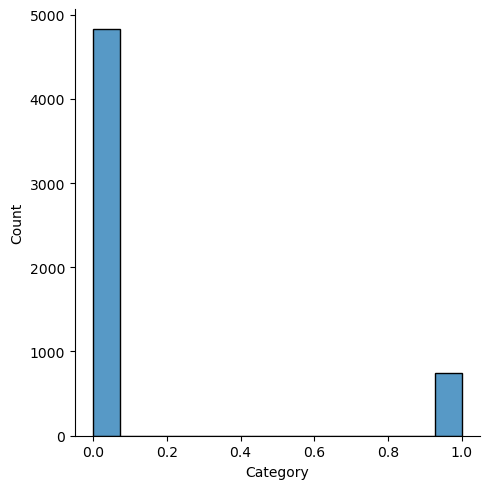

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.displot(mail_data['Category'])
plt.show()

# Splitting the data into train and test data

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


# Feature Extraction

In [70]:
#transforming the text data into feature vectors

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

x_train_features=feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)

#converting y_train and y_test values as integers

y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [71]:
print(x_train_features)

  (0, 4346)	0.3238008504874723
  (0, 2353)	0.2545072203817634
  (0, 6695)	0.3616065178053154
  (0, 5895)	0.415102954745324
  (0, 2719)	0.299459437576315
  (0, 3822)	0.37729728742748087
  (0, 3789)	0.4750235197588447
  (0, 3321)	0.2638802854739516
  (1, 4343)	0.6555659308129219
  (1, 1858)	0.5163195438969705
  (1, 3365)	0.5510421389942982
  (2, 4267)	0.531599749449541
  (2, 6215)	0.43979370278404856
  (2, 6597)	0.40097414833733686
  (2, 5672)	0.32606636481997364
  (2, 3025)	0.3502912545366897
  (2, 3185)	0.3663054742561573
  (3, 4447)	0.18080236341909536
  (3, 3084)	0.14346439189216004
  (3, 2877)	0.30030357190007717
  (3, 5515)	0.16439483489485024
  (3, 6922)	0.13381964389308706
  (3, 7080)	0.19700844583868773
  (3, 5535)	0.30030357190007717
  (3, 7398)	0.19877707762085306
  :	:
  (4454, 397)	0.31848634658760416
  (4454, 4027)	0.2561192223695296
  (4454, 6409)	0.2511086901671169
  (4454, 7382)	0.23350338191116915
  (4454, 4578)	0.28626353932821713
  (4455, 6600)	0.3164025961524856
  (4

In [72]:
#importing the models from scikit-learn

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score, recall_score , f1_score

## Building models

In [73]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    #training the model
    model.fit(x_train_features , y_train)
    
    #predictions
    y_train_pred = model.predict(x_train_features)
    y_test_pred = model.predict(x_test_features)
    
    #model performance on training data
    train_acc= accuracy_score(y_train , y_train_pred)
    train_f1_score = f1_score(y_train , y_train_pred , average='weighted')
    train_precision = precision_score(y_train , y_train_pred)
    train_recall = recall_score(y_train , y_train_pred)
    
    #model performance on testing data
    test_acc= accuracy_score(y_test , y_test_pred)
    test_f1_score = f1_score(y_test , y_test_pred , average='weighted')
    test_precision = precision_score(y_test , y_test_pred)
    test_recall = recall_score(y_test , y_test_pred)
    
    print(list(models.keys())[i])
    
    print("Model Performance for Training set")
    print("- Accuracy : {:.6f}".format(train_acc))
    print("- F1 score : {:.6f}".format(train_f1_score))
    print("- Precision : {:.6f}".format(train_precision))
    print("- Recall : {:.6f}".format(train_recall))
    
    print("-------------------------------------------")
    
    print("Model Performance for Testing set")
    print("- Accuracy : {:.6f}".format(test_acc))
    print("- F1 score : {:.6f}".format(test_f1_score))
    print("- Precision : {:.6f}".format(test_precision))
    print("- Recall : {:.6f}".format(test_recall))
    
    print("\n===========================================\n")


Random Forest
Model Performance for Training set
- Accuracy : 1.000000
- F1 score : 1.000000
- Precision : 1.000000
- Recall : 1.000000
-------------------------------------------
Model Performance for Testing set
- Accuracy : 0.980269
- F1 score : 0.979650
- Precision : 0.992126
- Recall : 0.857143


Decision Tree
Model Performance for Training set
- Accuracy : 1.000000
- F1 score : 1.000000
- Precision : 1.000000
- Recall : 1.000000
-------------------------------------------
Model Performance for Testing set
- Accuracy : 0.970404
- F1 score : 0.970096
- Precision : 0.907143
- Recall : 0.863946


Logistic Regression
Model Performance for Training set
- Accuracy : 0.968140
- F1 score : 0.966380
- Precision : 0.993534
- Recall : 0.768333
-------------------------------------------
Model Performance for Testing set
- Accuracy : 0.970404
- F1 score : 0.968893
- Precision : 0.991379
- Recall : 0.782313




Performance of the Random Forest Classifier on both the training and testing data is better than the remaining two.

# Training RandomForest Classifier

In [74]:
model=RandomForestClassifier()

In [75]:
#Training the RandomForest Classifier with the training data

model.fit(x_train_features,y_train)

RandomForestClassifier()

# Evaluating training model

In [76]:
#Prediction on Training Data

train_pred=model.predict(x_train_features)

#Accuracy on Training data
print('Accuracy on Training data: ',accuracy_score(train_pred,y_train))

Accuracy on Training data:  1.0


In [77]:
#Prediction on Testing Data

test_pred=model.predict(x_test_features)

#Accuracy on Testing data
print('Accuracy on Testing data: ',accuracy_score(test_pred,y_test))

Accuracy on Testing data:  0.9820627802690582


# Building predictive System

In [78]:
# giving ham,spam,ham mails as input for the model to predict
input =["Even my brother is not like to speak with me. They treat me like aids patent",
        "URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18",
        "I‘m going to try for 2 months ha ha only joking"]

#converting the input data to feature vectors
input_feature_vector=feature_extraction.transform(input)

#Predicting
prediction=model.predict(input_feature_vector)
print(prediction)

for i in prediction:
  if i==0:
    print("ham", end="  ")
  else:
    print("spam", end="  ")


[0 1 0]
ham  spam  ham  